In [10]:
#코랩에서 작성할 경우 아래 주석을 해제해주세요
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import re
import pandas as pd

# 메모장 파일 경로
file_path2 = '/content/drive/MyDrive/DSL-1/자치구별 뉴스 크롤링/high_correlation_pairs.txt'

# 메모장 파일 읽기
with open(file_path2, 'r', encoding='utf-8') as file:
    content = file.readlines()

# 상관계수와 업종 추출을 위한 정규 표현식 패턴
pattern = re.compile(r'(.+) ↔ (.+) \(Correlation: ([0-9.]+), p-value: ([0-9.e-]+)\)')

# 데이터를 저장할 리스트
data = []

# 파일 내 각 라인에서 정보 추출
for line in content:
    match = pattern.match(line.strip())  # 공백 제거 후 매칭
    if match:
        o_industry = match.group(1)  # 출발 업종
        d_industry = match.group(2)  # 도착 업종
        correlation = float(match.group(3))  # 상관계수
        p_value = float(match.group(4))  # p-value

        # 데이터를 리스트에 추가
        data.append([o_industry, d_industry, correlation, p_value])

# 데이터프레임 생성
df = pd.DataFrame(data, columns=['출발 업종', '도착 업종', '상관계수', 'p-value'])

# 특정 업종과 관련된 결과 검색
def search_related_industries(industry):
    related_df = df[
        (df['출발 업종'].str.contains(industry, case=False)) |
        (df['도착 업종'].str.contains(industry, case=False))
    ]
    return related_df.sort_values(by='상관계수', ascending=False)

# 🔍 "커피"와 관련된 업종 찾기
industry_to_search = "복권"
related_industries = search_related_industries(industry_to_search)

# 결과 출력
print(f"'{industry_to_search}'와 높은 상관계수를 가지는 업종들:")
print(related_industries)


'복권'와 높은 상관계수를 가지는 업종들:
         출발 업종          도착 업종    상관계수   p-value
652    그릇/주방기기             복권  0.8868  0.000000
2348        복권        생활장비 대여  0.8783  0.000000
2362        복권           해외사용  0.8783  0.000000
2355        복권          자사가맹점  0.8783  0.000000
2363        복권  환경측정/검사/평가서비스  0.8779  0.000000
2345        복권          상조서비스  0.8777  0.000000
1379       면세점             복권  0.8777  0.000000
2364        복권            휴대폰  0.8776  0.000000
2353        복권          의류 대여  0.8773  0.000000
2344        복권           사회단체  0.8754  0.000000
2361        복권           통신요금  0.8733  0.000000
2351        복권           연금매장  0.8693  0.000000
2347        복권           생활용품  0.8673  0.000000
2359        복권            택배업  0.8644  0.000000
1620    버스/지하철             복권  0.8595  0.000000
2346        복권       상품권/기프티콘  0.8548  0.000000
2350        복권            여행사  0.8505  0.000000
2354        복권            인쇄업  0.8496  0.000000
2356        복권          조합/협회  0.8416  0.000000
2352        복권  

In [35]:
import re
import pandas as pd

# 메모장 파일 경로
file_path = '/content/drive/MyDrive/DSL-1/자치구별 뉴스 크롤링/상관계수가 0.9 이상.txt'

# 메모장 파일 읽기
with open(file_path, 'r', encoding='utf-8') as file:
    content = file.readlines()

# 상관계수와 업종 추출을 위한 정규 표현식 패턴
pattern = re.compile(r'(.+) \((.+)\) ↔ (.+) \((.+)\) \(상관계수: ([0-9.]+)\)')

# 추출된 데이터를 저장할 리스트
data = []

# 파일 내 각 라인에서 정보 추출
for line in content:
    match = pattern.match(line.strip())  # 공백 제거 후 매칭
    if match:
        o_industry = match.group(1)  # 출발 업종
        o_category = match.group(2)  # 출발 업종 카테고리
        d_industry = match.group(3)  # 도착 업종
        d_category = match.group(4)  # 도착 업종 카테고리
        correlation = float(match.group(5))  # 상관계수

        # 데이터를 리스트에 추가
        data.append([o_industry, o_category, d_industry, d_category, correlation])

# 데이터프레임 생성
df = pd.DataFrame(data, columns=['출발 업종', '출발 업종 카테고리', '도착 업종', '도착 업종 카테고리', '상관계수'])

# 특정 업종과 관련된 결과 검색
def search_related_industries(industry):
    # 출발 업종과 도착 업종 모두에서 검색
    related_df = df[
        (df['출발 업종'].str.contains(industry, case=False)) |
        (df['도착 업종'].str.contains(industry, case=False))
    ]
    return related_df.sort_values(by='상관계수', ascending=False)

# "커피"와 관련된 업종 찾기
industry_to_search = "인쇄업"
related_industries = search_related_industries(industry_to_search)

# 결과 출력
print(f"'{industry_to_search}'와 높은 상관계수를 가지는 업종들:")
print(related_industries)

'인쇄업'와 높은 상관계수를 가지는 업종들:
         출발 업종 출발 업종 카테고리 도착 업종 도착 업종 카테고리   상관계수
294     🔹 생활용품       일반유통   인쇄업      전문서비스  0.989
287     🔹 사회단체      생활서비스   인쇄업      전문서비스  0.979
344       🔹 신발       일반유통   인쇄업      전문서비스  0.978
368      🔹 인쇄업      전문서비스    커피         음식  0.967
369      🔹 인쇄업      전문서비스   택배업      생활서비스  0.958
106  🔹 그릇/주방기기       일반유통   인쇄업      전문서비스  0.933


In [ ]:
!pip install konlpy

In [ ]:
pip install wordcloud matplotlib konlpy

In [ ]:
!apt-get update -y
!apt-get install -y fonts-nanum

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Fetched 255 kB in 3s (89.3 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lis

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt

# 엑셀 파일 경로 지정
file_path1 = '/content/drive/MyDrive/DSL-1/자치구별 뉴스 크롤링/강남구 놀거리.csv'
file_path2 = '/content/drive/MyDrive/DSL-1/자치구별 뉴스 크롤링/역삼 핫플.csv'

# 데이터 불러오기
news_df1 = pd.read_csv(file_path1)
news_df2 = pd.read_csv(file_path2)

# 두 데이터프레임 합치기
combined_df = pd.concat([news_df1, news_df2], ignore_index=True)

# 형태소 분석기 초기화
okt = Okt()

# 뉴스 제목을 하나의 텍스트로 합치기
corpus = ' '.join(combined_df['title'])

# 명사만 추출하여 새로운 텍스트 만들기
def extract_nouns(text):
    return ' '.join(okt.nouns(text))

# 명사 추출한 결과로 새로운 텍스트 생성
corpus_nouns = extract_nouns(corpus)

# TF-IDF 벡터라이저 생성
vectorizer = TfidfVectorizer(stop_words='english', max_features=400)  # 상위 300개 키워드 추출

# TF-IDF 매트릭스 생성
tfidf_matrix = vectorizer.fit_transform([corpus_nouns])

# 키워드와 TF-IDF 점수 출력
feature_names = vectorizer.get_feature_names_out()
word_frequencies = {feature_names[i]: tfidf_matrix[0, i] for i in range(len(feature_names))}

print("주요 키워드와 TF-IDF 점수:")
for i in range(len(feature_names)):
    print(f"{feature_names[i]}: {tfidf_matrix[0, i]:.4f}")

주요 키워드와 TF-IDF 점수:
가게: 0.0121
가격: 0.0153
가기: 0.0060
가능: 0.0228
가득: 0.0044
가로수길: 0.0413
가성: 0.0133
가장: 0.0051
가족: 0.0049
가지: 0.0052
갈비: 0.0112
감성: 0.0150
감자탕: 0.0077
강남: 0.3693
강남구: 0.1655
강남대로: 0.0356
강남역: 0.1652
강추: 0.0050
개수: 0.3838
갤러리: 0.0046
거리: 0.2761
건물: 0.0179
검색: 0.0042
게임: 0.0119
겨울: 0.0063
계속: 0.0044
고기: 0.0195
고민: 0.0056
고양이: 0.0067
골목: 0.0074
골프: 0.0092
곱창: 0.0040
공간: 0.0216
공영: 0.0058
공원: 0.0159
구경: 0.0075
구매: 0.0046
구이: 0.0103
그냥: 0.0052
근처: 0.0377
기간: 0.0087
기본: 0.0079
기분: 0.0049
날씨: 0.0055
내부: 0.0160
넘버: 0.0052
네이버: 0.0097
노트: 0.0049
논현: 0.0170
논현로: 0.0067
느낌: 0.0154
다락: 0.0061
다른: 0.0077
다시: 0.0046
다음: 0.0093
다이닝: 0.0056
다이스: 0.0070
단체: 0.0124
대기: 0.0043
대형: 0.0066
데이트: 0.1254
도보: 0.0200
도산: 0.0289
도산대로: 0.0079
도서관: 0.0264
도착: 0.0046
동궁: 0.0068
드로잉: 0.0043
디저트: 0.0171
때문: 0.0060
라떼: 0.0063
라스트: 0.0094
라운지: 0.0088
러너: 0.0052
레드: 0.0081
레스토랑: 0.0242
레슨: 0.0045
레이스: 0.0119
로데오: 0.0267
루팡: 0.0060
루프: 0.0060
리뷰: 0.0124
마당: 0.0259
마을: 0.0051
마음: 0.0061
맛집: 0.2455
매일: 0.0425

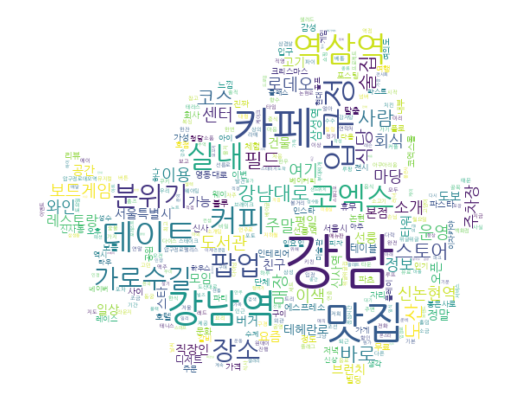

In [ ]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt

# 사용자가 삭제할 키워드 입력 (예시: "강남", "서울")
keywords_to_remove = ["서초구","근처","주차","추천", "시간", "서울","거리","강남구","사진", "전화번호","강남구","송파구","예약", "방문", "메뉴","점심","역삼동",
                      "위치","개수","호선","주소","후기","핫플","역삼","영업", "오늘", "출구","매일","지하"]  # 삭제할 키워드 리스트

# 삭제할 키워드를 word_frequencies에서 제거
for keyword in keywords_to_remove:
    if keyword in word_frequencies:
        del word_frequencies[keyword]

# 서울 지도 모양 이미지 불러오기 (흑백 이미지)
mask_image = np.array(Image.open("/content/drive/MyDrive/DSL-1/자치구별 뉴스 크롤링/서울 지도 형태.png"))


# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",  # 한글 폰트 경로
    background_color="white",
    mask=mask_image,
    max_words=500,
    width=1600, height=1300,
    max_font_size=100,    # 최대 글자 크기
    min_font_size=1,     # 최소 글자 크기
    relative_scaling=0    # 빈도에 따른 글자 크기 차이를 더 크게 함
).generate_from_frequencies(word_frequencies)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# TF-IDF 점수가 높은 상위 20개 키워드 추출
top_keywords = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:20]

print("\n상위 20개 주요 키워드:")
for word, score in top_keywords:
    print(f"{word}: {score:.4f}")


상위 20개 주요 키워드:
강남: 0.3693
맛집: 0.2455
카페: 0.1875
강남역: 0.1652
역삼역: 0.1600
데이트: 0.1254
압구정: 0.0673
코엑스: 0.0654
실내: 0.0537
커피: 0.0485
분위기: 0.0478
팝업: 0.0430
가로수길: 0.0413
장소: 0.0374
강남대로: 0.0356
식당: 0.0339
필드: 0.0307
사람: 0.0301
스토어: 0.0298
도산: 0.0289
